In [1]:
import pandas as pd
import numpy as np

rng = np.random.default_rng()

In [15]:
boardSize = 100
antScanDistance = 5


In [66]:
data = pd.read_csv(
    "./Audytorium/sdmt1.txt",
    sep='\t',
    header=None,
    names=['depth', 'value1', 'value2']
)

data.insert(0, 'ID', range(0, 0 + len(data)))

spawnPositions = pd.DataFrame(rng.integers(0, boardSize, size=(len(data.index), 2)), columns=list('xy'))

data = pd.concat([data, spawnPositions], axis=1)

data.insert(6, 'isOnTheGround', True)

data.head()

,ID,depth,value1,value2,x,y,isOnTheGround
0,0,"2,6",335,500,5,5,True
1,1,"2,8",390,650,25,50,True
2,2,3,435,750,11,5,True
3,3,"3,2",385,750,43,24,True
4,4,"3,4",150,450,27,49,True


<AxesSubplot:xlabel='x', ylabel='y'>

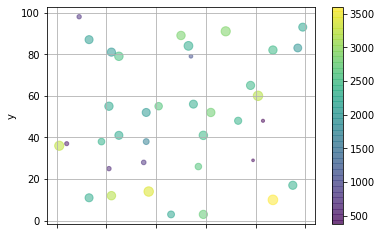

In [4]:
data.plot.scatter(x="x", y="y", s=data["value1"]/20, c=data["value2"], cmap='viridis', alpha=0.5, grid=True)

In [68]:
class Ant:
    def __init__(self):
        self.x = rng.integers(0, boardSize)
        self.y = rng.integers(0, boardSize)
        self.isCarring = False

    def tick(self):
        self.move()
        isStandingOnSeed = self.isStandingOnSeed()
        if isStandingOnSeed != -1:
            if not self.isCarring:
                self.pickUp(isStandingOnSeed)
        else:
            if self.isCarring:
                self.drop()

        pass

    def move(self):
        # TODO: Needs improvement - ant is generally constantly in the same region 
        deltaX = rng.integers(-1, 2)
        deltaY = rng.integers(-1, 2)

        newX = self.x + deltaX
        if(newX >= 0 and newX < boardSize):
            self.x = newX

        newY = self.y + deltaY
        if(newY >= 0 and newY < boardSize):
            self.y = newY
        pass

    def isStandingOnSeed(self):
        i = 0
        for x, y in zip(data['x'], data['y']):
            if (x == self.x) and (y == self.y):
                return i
            i += 1
        return -1

    def scanEnvironment(self):
        closeSeeds = []

        i = 0
        for x, y in zip(data['x'], data['y']):
            if (x > self.x - antScanDistance) and (x < self.x + antScanDistance):
                if (y > self.y - antScanDistance) and (y < self.y + antScanDistance):
                    closeSeeds.append(i)
            i += 1

        return closeSeeds

    def pickUp(self, id):
        print("MAM!")
        data['isOnTheGround'][id] = False
        pass

    def drop(self):
        pass





ant = Ant()

for i in range(0, 1000):
    ant.move()
    # print(ant.x, ant.y)
    # ant.scanEnvironment()
    ant.tick()



MAM!
MAM!
MAM!
MAM!


In [65]:
data

,ID,depth,value1,value2,x,y,isOnTheGround
0,0,"2,6",335,500,73,70,False
1,1,"2,8",390,650,81,68,False
2,2,3,435,750,72,3,False
3,3,"3,2",385,750,70,99,False
4,4,"3,4",150,450,2,44,False
5,5,"3,6",200,370,45,78,False
6,6,"3,8",277,1100,64,21,False
7,7,4,700,1700,31,12,False
8,8,"4,2",900,2360,47,6,False
9,9,"4,4",860,2640,96,96,False
